# Recitation 2 - Scikit Learn

We'll be going over using Google Colab (IPython/Jupyter Notebooks) and some basic machine learning concepts using Scikit-learn.

## Google Collab

* Allows you to run Python code in your browser. Uses Jupyter Notebooks.

* Comes preloaded with several popular data science libraries. numpy, scikit learn, tensorflow etc.

* Most features provided by iPython notebook. Some very cool ones!

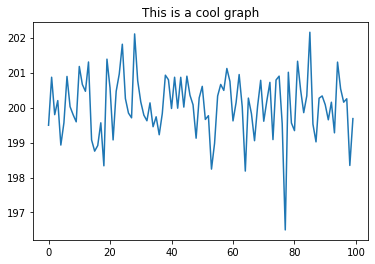

In [35]:
# Use numpy to generate random data, and matplotlib to display it

import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

# show documentation!
plt.plot?

plt.plot(x, ys)
plt.title("This is a cool graph")
plt.show()

## Scikit Learn: Introduction

* Most popular machine learning toolkit, used by data scientists everyday around the world.
* Provides tools for standard statistical machine learning.
* Easy modeling using standard ML algorithms such as classification, regression, clustering and several more. 



## Scikit Learn: Datasets

* Well, the first thing you need for machine learning is data. Scikit-learn provides us some assistance with this.

* The library comes with some predefined toy datasets that you can *load*, while larger, more comprehensive datasets are also supported which you must *fetch*

* Often, data is represented as basic table in a two-dimensional grid of data, in which the
  * rows represent individual elements of the dataset
  * columns represent quantities related to each of these elements.




In [5]:
# Magic command for ipython notebooks. Imports numpy and matplotlib automagically
%pylab inline

from sklearn import datasets
ds = datasets.load_iris()

# Larger dataset which is fetched.
# ds = datasets.fetch_olivetti_faces()

print ('IRIS dataset')
print(ds.feature_names)
print(ds.data[:5])

Populating the interactive namespace from numpy and matplotlib
IRIS dataset
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### Features matrix

* The data matrix we just saw is called the *features matrix* with dimensions ``[n_samples * n_features]``
* By convention, this features matrix is often stored in a variable named ``X``, is two dimensional in shape and usually a Numpy array.
* The samples (i.e., rows) always refer to the individual objects described by the dataset. In the Iris dataset, the sample is a flower.
* The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Usually numbers or booleans.

#### Target array

* In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
* The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array.
* The target array may have continuous numerical values, or discrete classes/labels.

**Essentially, the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.**

For example, with the Iris dataset, we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the species column would be considered the target array.


![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)


## Scikit Learn - Estimators 

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data. For supervised learning, often we predict labels for unknown data using the ``predict()`` method.

## Scikit Learn - Classification Example

Let's try and predict the species of a flower. We train a model and then we input some attributes of a flower and expect the model to predict the species of that flower.

For this task, we will use an extremely simple model known as Gaussian naive Bayes classifier. It is fast and has no hyperparameters to choose, so it's a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

# Toy dataset, X returns a matrix with the species column dropped
# y is the feature matrix corresponding to species we want to train the model with
X, y = datasets.load_iris(return_X_y=True)

m = GaussianNB()
m.fit(X, y)

# Cheating! Predicting on trained data. Exam analogy
print('Predicting for - ', X[0])
y_model = m.predict([X[0]])

# 0 is Iris Setosa. 
print('Prediction - ', y_model)

# Correct!
print('Correct ans is - ', y[0])

Predicting for -  [5.1 3.5 1.4 0.2]
Prediction -  [0]
Correct ans is -  0


## Scikit Learn - Model Validation with Holdout sets

* Model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

* However, our model validation technique in the previous approach contains a fundamental flaw: *it trains and evaluates the model on the same data*.

* We want to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*. That is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris

X, y = datasets.load_iris(return_X_y=True)

# X1 and y1 are training data, X2 and y2 are test data
X1, X2, y1, y2 = train_test_split(X, y, random_state=1, train_size=0.5)

m = GaussianNB()

# Train the model with allocated training data
m.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = m.predict(X2)

# evaluate the model on the second set of data
from sklearn.metrics import accuracy_score
accuracy_score(y2, y2_model)

0.96

## Scikit Learn - Model Validation via cross-validation

* One disadvantage of using holdout sets for model validation is that we lose a portion of our data to the model training. Above, half the dataset does not contribute to the training of the model! Particularly problematic for small datasets.

* One way to address this is to use *cross-validation*; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

![](https://i.imgur.com/W9QGozt.png)

* Cross-validation simply repeating the experiment multiple times, using all the different parts of the training set as validation sets and gives a more accurate indication of how well the model generalizes to unseen data.

In [13]:
# Let's switch up our model
# Here we'll use a k-neighbors classifier with n_neighbors=1.
from sklearn.neighbors import KNeighborsClassifier

# This is a very simple and intuitive model
# "the label of an unknown point is the same as the label of its closest training point:"
m2 = KNeighborsClassifier(n_neighbors=1)

y2_model = m2.fit(X1, y1).predict(X2)
y1_model = m2.fit(X2, y2).predict(X1)

# Print accuracy scores for both models, see which one works better.
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9333333333333333, 0.9466666666666667)

* Scikit-learn provides several cross-validation techniques, all useful for different use-cases.
* Scikit-learn also provides cross-validated models (suffixed by 'CV'). For example, `ElasticNetCV` which is a linear model, running up to 1000 cross-validated models and allows you to pick the best one.


## Scikit Learn - Other important modelling steps

* **Feature Selection** - Selecting only a subset of the features from the feature matrix to train your model with
  * Simplest way is using Variance thresholding. In simpler words, remove features that stay mostly the same across several samples

* **Hyperparameter tuning** - After having selected your model, how do you pick the most optimal set of Hyperparameters ? Scikit learn provides you with something called `GridSearchCV` - which exhaustively searches for a combination of all parameter values for candidates. 

## Done!

You now know a teeny tiny bit of scikit learn, enough to build rudimentary ML models. You will use some of these techniques taught in your assignments. 

**References**:
1. [Google Colab - Scikit Learn Intro](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=jP84XpN7Sqqz)
2. [Google Colab - Hyperparameters and Model Tuning](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb#scrollTo=1arRonIldT2p)
3. [A Bit of Data Science and Scikit-learn](https://www.youtube.com/playlist?list=PLgJhDSE2ZLxb33q-x5592LCiVRsHDxVf3)